## Deep Fake Detection

In this project we are going to utilize the **Deepfake and real images** Dataset from Kaggle which consisit of 256 X 256 pixel jpg image of human face either real or fake.

Data Link: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images/data



In [24]:
import tensorflow as tf                                   # Used to build and train the CNN model
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt                           # Used to visualize images from the CIFAR-10 dataset
import numpy as np                                        # Handles array operations
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/umidu/OneDrive/Desktop/AI Project/Dataset/Dataset/train",
    batch_size=batch_size,
    image_size=(128, 128),  
)


val_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/umidu/OneDrive/Desktop/AI Project/Dataset/Dataset/validation",
    batch_size=batch_size,
    image_size=(128, 128),
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/umidu/OneDrive/Desktop/AI Project/Dataset/Dataset/test",
    batch_size=batch_size,
    image_size=(128, 128),
)

Found 10002 files belonging to 2 classes.
Found 2002 files belonging to 2 classes.
Found 1002 files belonging to 2 classes.


In [26]:
class_names = ['Real', 'Fake']

In [27]:
train_images = tf.data.experimental.cardinality(train_ds).numpy() * batch_size
val_images = tf.data.experimental.cardinality(val_ds).numpy() * batch_size
test_images = tf.data.experimental.cardinality(test_ds).numpy() * batch_size

print(
    f"Number of training batches: {tf.data.experimental.cardinality(train_ds)}")
print(
    f"Number of validation batches: {tf.data.experimental.cardinality(val_ds)}")
print(f"Number of test batches: {tf.data.experimental.cardinality(test_ds)}")
print(
    f"Approximate total images: Train: {train_images}, Validation: {val_images}, Test: {test_images}")

Number of training batches: 313
Number of validation batches: 63
Number of test batches: 32
Approximate total images: Train: 10016, Validation: 2016, Test: 1024


In [28]:
class_counts = {name: 0 for name in class_names}
for images, labels in train_ds:
    for label in labels:
        class_counts[class_names[int(label)]] += 1

print("Class distribution in training data:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Class distribution in training data:
Real: 5001 images
Fake: 5001 images


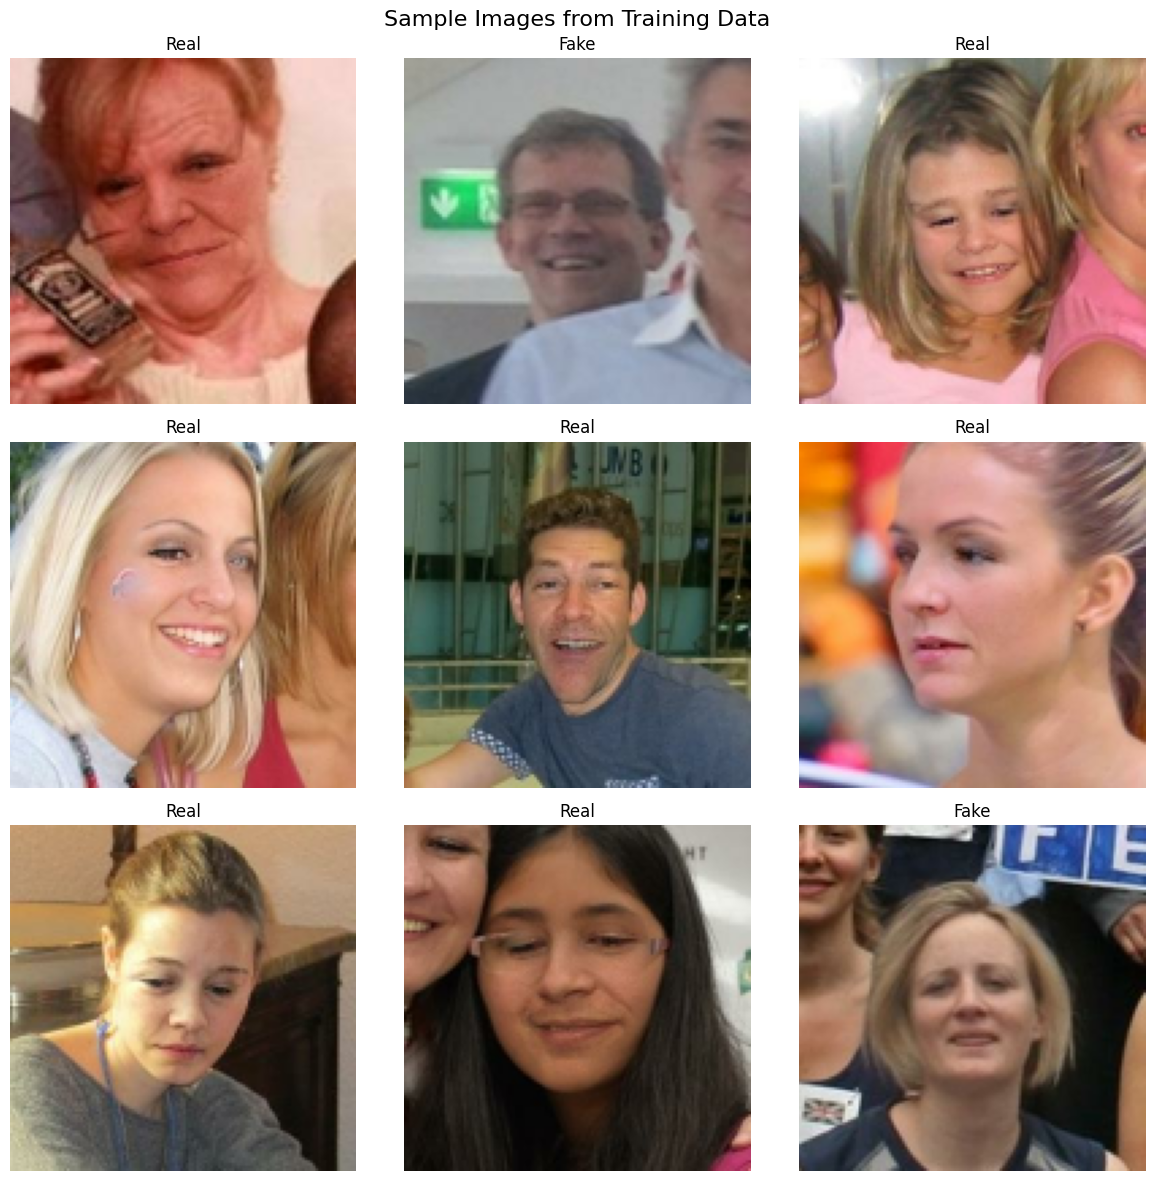

In [29]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.suptitle("Sample Images from Training Data", fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
for images, _ in train_ds.take(1):
    print(f"\nImage shape: {images[0].shape}")
    print(f"Image dtype: {images[0].dtype}")


Image shape: (128, 128, 3)
Image dtype: <dtype: 'float32'>


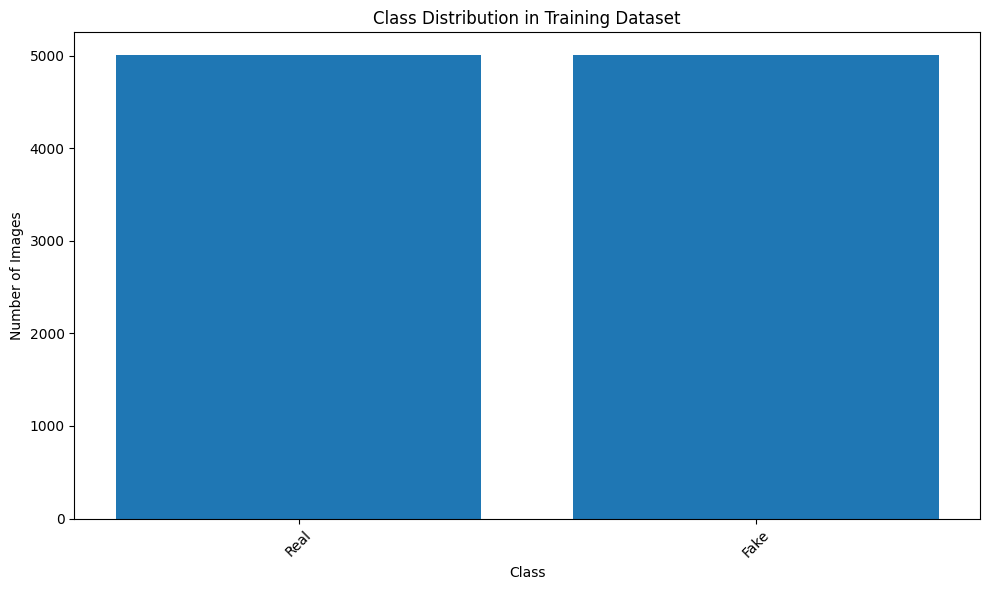

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

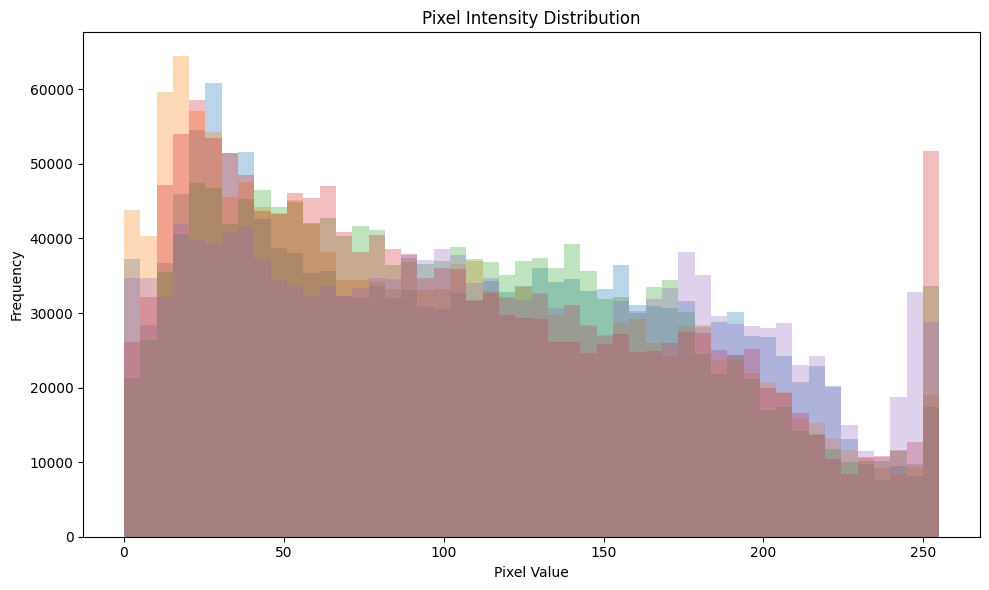

In [32]:
plt.figure(figsize=(10, 6))
for images, _ in train_ds.take(5):  # Take 5 batches
    # Flatten all images in batch to 1D arrays and concatenate
    flattened = tf.reshape(images, [-1])
    plt.hist(flattened.numpy(), bins=50, alpha=0.3)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [33]:
# Normalize pixel values to be between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [34]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\umidu\anaconda3\envs\sg_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

In [36]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=2, restore_best_weights=True)

In [37]:
# Train the model
history = model.fit(train_ds, epochs=5,
                    validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1255s 4s/step - accuracy: 0.6684 - loss: 0.7300 - val_accuracy: 0.7288 - val_loss: 0.5363
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1173s 4s/step - accuracy: 0.8117 - loss: 0.4138 - val_accuracy: 0.7742 - val_loss: 0.5217
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1291s 4s/step - accuracy: 0.8477 - loss: 0.3422 - val_accuracy: 0.7717 - val_loss: 0.5059
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1098s 4s/step - accuracy: 0.8871 - loss: 0.2721 - val_accuracy: 0.8237 - val_loss: 0.4287
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1039s 3s/step - accuracy: 0.9210 - loss: 0.2032 - val_accuracy: 0.8167 - val_loss: 0.5022


In [38]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc}")

32/32 - 2s - 78ms/step - accuracy: 0.7635 - loss: 0.5549
Test accuracy: 0.7634730339050293


In [39]:
# Save the trained model in .h5 format
model_save_path = 'fake_image_detector.h5'
model.save(model_save_path)
print(f"Model saved successfully to {model_save_path}")

Model saved successfully to fake_image_detector.h5
